# Gaussian Process Regression Tutorial

This short notebook gives a self‑contained example of **Gaussian Process (GP) regression** on a toy 1‑D dataset.
We implement the RBF kernel and prediction formulas *manually* so that every equation is transparent.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    """Isotropic squared‑exponential kernel."""
    sqdist = np.sum(x1**2,1).reshape(-1,1) + np.sum(x2**2,1) - 2*np.dot(x1, x2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

In [17]:
# Synthetic training data
rng = np.random.default_rng(0)
X_train = np.linspace(-5, 5, 25).reshape(-1,1)
y_train = np.sin(X_train[:,0]) + 0.3*rng.standard_normal(X_train.shape[0])

# Dense test grid
X_test = np.linspace(-6, 6, 400).reshape(-1,1)

In [18]:
length_scale = 1.0
sigma_f = 1.0
sigma_y = 0.3    # noise std

# Kernel (training, training)
K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + sigma_y**2 * np.eye(len(X_train))

# Kernel (training, test) and (test, test)
K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f)

# Invert K
K_inv = np.linalg.inv(K)

# Predictive mean and covariance
mu_s = K_s.T @ K_inv @ y_train
cov_s = K_ss - K_s.T @ K_inv @ K_s
std_s = np.sqrt(np.diag(cov_s))

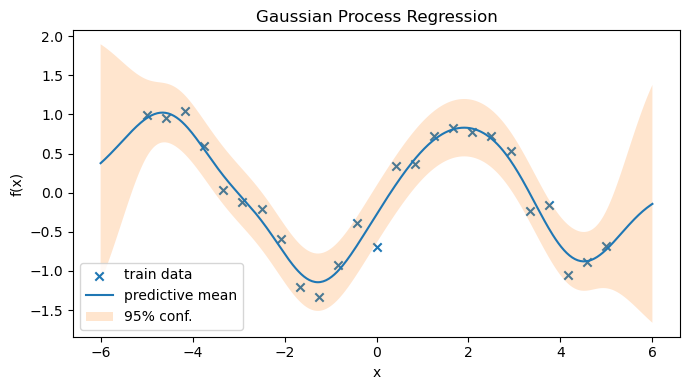

In [19]:
plt.figure(figsize=(7,4))
plt.scatter(X_train[:,0], y_train, marker='x', label='train data')
plt.plot(X_test[:,0], mu_s, label='predictive mean')
plt.fill_between(X_test[:,0], mu_s-2*std_s, mu_s+2*std_s, alpha=0.2, label='95% conf.')
plt.legend()
plt.title('Gaussian Process Regression')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.tight_layout()
plt.show()

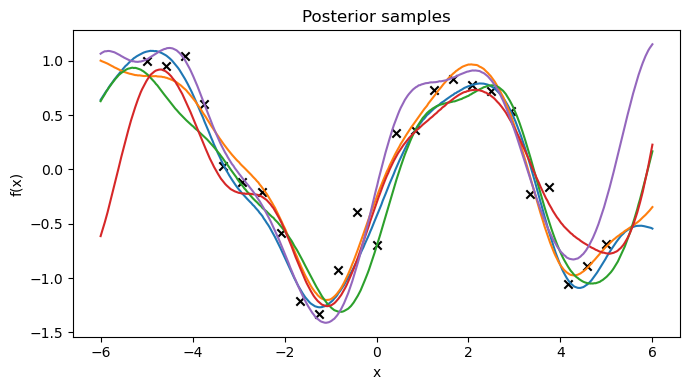

In [20]:
# Draw posterior samples
rng = np.random.default_rng(1)
L = np.linalg.cholesky(cov_s + 1e-6*np.eye(len(X_test)))
f_post = mu_s[:, None] + L @ rng.standard_normal((len(X_test), 5))

plt.figure(figsize=(7,4))
for i in range(5):
    plt.plot(X_test[:,0], f_post[:,i])
plt.scatter(X_train[:,0], y_train, marker='x', c='k')
plt.title('Posterior samples')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.tight_layout()
plt.show()